# Machine Learning Pipeline for Mortgage Backed Securities Prepayment Risk

## The LoanExport data consists of 291451 rows and 28 columns. The columns of the dataset are explained below:

### 0   CreditScore :                     Credit score of the client 
###  1   FirstPaymentDate  :         First payment date of the customer
###  2   FirstTimeHomebuyer :     If the customer is first time home buyer 
###  3   MaturityDate   :                 Maturity date of the customer 
###  4   MSA  :                                Mortgage security amount
###  5   MIP   :                                Mortgage insurance percentage  
###  6   Units  :            Number of units  
###  7   Occupancy  :        Occupancy status at the time the loan
###  8   OCLTV  :            Original Combined Loan-to-Value 
###  9   DTI  :              Debt to income ratio 
###  10  OrigUPB  :          Original unpaid principal balance
###  11  LTV   :          Loan-to-Value 
###  12  OrigInterestRate :   Original interest rate
###  13  Channel  :           The origination channel used by the party
###  14  PPM  :               Prepayment penalty mortgage
###  15  ProductType  :       Type of product 
###  16  PropertyState  :     State in which the property is located 
###  17  PropertyType :       Property type 
###  18  PostalCode  :        Postal code of the property
###  19  LoanSeqNum  :        Loan number
###  20  LoanPurpose   :      Purpose of the loan
###  21  OrigLoanTerm  :      Original term of the loan 
###  22  NumBorrowers :       Number of borrowers 
###  23  SellerName  :        Name of seller
###  24  ServicerName  :      Name of the service used
###  25  EverDelinquent  :    If the loan was ever delinquent  
###  26  MonthsDelinquent  :  Months of delinquent  
###  27  MonthsInRepayment :  Months in repayment

## Importing libraries and data. We will do basic analysis of data.

In [1]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import xlrd
#warning hadle
import warnings# warning filter
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
#Read files:
data = pd.read_csv("LoanExport.csv", header= 0)
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [4]:
data.shape

(291451, 28)

In [5]:
data.describe(include= "all")

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451,291451.000000,291451,291451.000000,291451.000000,291451,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451,291451,291451,291451,291451,291451,291451,291451,291451.000000,291451,266457,291451,291451.000000,291451.000000,291451.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,1,53,7,1767,291451,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,T,N,FRM,CA,SF,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,184154,NaN,39100,NaN,NaN,276131,NaN,NaN,NaN,NaN,NaN,167670,282125,291451,43327,244923,2582,1,123404,NaN,187335,76943,64043,NaN,NaN,NaN
mean,708.936991,199904.760553,NaN,202902.367043,NaN,9.216685,1.026022,NaN,76.960529,30.033453,124940.387921,76.937986,6.926547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.835375,NaN,NaN,NaN,0.197848,1.837729,60.805291
std,68.408791,13.821228,NaN,16.090508,NaN,12.648273,0.202986,NaN,15.236154,13.203974,53657.440624,15.225298,0.343541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.286939,NaN,NaN,NaN,0.398378,8.809392,46.142599
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,8000.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,83000.000000,70.000000,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,117000.000000,80.000000,6.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,160000.000000,90.000000,7.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


## There are no duplicates in data, but there are some null values.

In [6]:
# Checking duplicate rows
len(data[data.duplicated()])

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [8]:
data.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## we know that seller type is not an important column for further analysis, so for the time being we can replace missing values as others (O) as we will drop the column later.

In [9]:
data['SellerName']=data['SellerName'].replace(np.nan,'O')

## We will convert the dates in  data into date types

In [10]:
# Convert FirstPaymentDate ' and 'MaturityDate' columns to datetime format
data['Year']=pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%Y')
data['FirstPaymentDate'] = pd.to_datetime(data['FirstPaymentDate'], format='%Y%M').dt.strftime('%m/%Y')
data['MaturityDate'] = pd.to_datetime(data['MaturityDate'], format='%Y%M').dt.strftime('%m/%Y')

# Verify the changes
print(data[['FirstPaymentDate', 'MaturityDate']])

       FirstPaymentDate MaturityDate
0               01/1999      01/2029
1               01/1999      01/2029
2               01/1999      01/2029
3               01/1999      01/2029
4               01/1999      01/2029
...                 ...          ...
291446          01/1999      01/2029
291447          01/2002      01/2029
291448          01/2003      01/2029
291449          01/1999      01/2029
291450          01/1999      01/2029

[291451 rows x 2 columns]


## We check for unique values in each column

In [11]:
# check unique values in dataset
data.apply(lambda x: (x.unique()))

CreditScore           [0, 335, 342, 363, 366, 370, 375, 391, 396, 44...
FirstPaymentDate      [01/1999, 01/2000, 01/2001, 01/2002, 01/2003, ...
FirstTimeHomebuyer                                            [N, X, Y]
MaturityDate          [01/2029, 01/2027, 01/2024, 01/2026, 01/2030, ...
MSA                   [16974, 19740, 29940, 31084, 35644, X    , 367...
MIP                   [25, 0, 30, 12, 35, 29, 17, 18, 20, 22, 6, 14,...
Units                                                   [1, 2, 4, 3, 0]
Occupancy                                                     [O, I, S]
OCLTV                 [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
DTI                   [27, 17, 16, 14, 18, 40, 21, 20, 38, 19, 23, 4...
OrigUPB               [117000, 109000, 88000, 160000, 207000, 111000...
LTV                   [89, 73, 75, 76, 78, 90, 72, 95, 80, 77, 85, 9...
OrigInterestRate      [6.75, 6.5, 6.875, 7.125, 7.0, 7.25, 6.625, 7....
Channel                                                    [T, R

## We can observe that some data are not provided and is marked as X

In [12]:
count = (data.astype(str).applymap(str.strip) == "X").sum()

print(count)


CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer    78015
MaturityDate              0
MSA                   39100
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                    5405
ProductType               0
PropertyState             0
PropertyType             22
PostalCode                6
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers            339
SellerName                0
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
Year                      0
dtype: int64


## We will change X values of NumBorrowers by its mode "2" and PropertyType by SF

In [13]:
data.drop(data[data['NumBorrowers'] == 'X '].index, inplace=True)
data['NumBorrowers']=data['NumBorrowers'].astype(int)

In [14]:
data['PropertyType'].replace('X ', 'SF', inplace=True)

## First we will remove X in the FirstTimeHomebuyer column as it is irrelevant.

In [15]:
c= ((data['FirstTimeHomebuyer'].value_counts()))
print(c)

N    183988
X     77850
Y     29274
Name: FirstTimeHomebuyer, dtype: int64


In [16]:
data.drop(data[data['FirstTimeHomebuyer'] == 'X'].index, inplace=True)
data['FirstTimeHomebuyer'].unique()

array(['N', 'Y'], dtype=object)

## We do not need column  PostalCode  for further analysis as we can use propertystate instead

In [17]:
data.drop(['PostalCode','ProductType','LoanSeqNum'], axis=1, inplace=True)


## We will delete the rows with X in the columns 'MSA' and 'PPM' to clean data. We cannot use imputation method here as it will affect the integrity of the data.

In [18]:
data = data[(data[['MSA','PPM']].apply(lambda x: x.str.strip()) != 'X').all(axis=1)]
count = (data.astype(str).applymap(str.strip) == "X").sum()
print(count)


CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64


## There are only two rows with date 2011 and 2013. We can remove this as it affects our analysis.

In [19]:
data=data[data['FirstPaymentDate'] < '01/2011']

In [20]:
data.shape

(181684, 26)

## We will also remove null values

In [21]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
PropertyState         0
PropertyType          0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
Year                  0
dtype: int64

In [22]:
data.dropna(inplace=True)

data.shape


(181684, 26)

# Exploratory Data Analysis

## We set our target variable as EverDelinquent and do our analysis based on that. Before that we will be creating some new columns that will help in our analysis. 

## We will create a band for CreditScores. The more the credit scores are the better for the bank.CreditScore contains a 0 which the data definition states is actually 850. Let's convert all 0's to 850

In [23]:

data['CreditScore'] = np.where(data['CreditScore'] == 0,850 , data['CreditScore'])
data.CreditScore.unique()

array([850, 335, 342, 366, 375, 396, 466, 471, 477, 479, 482, 483, 486,
       487, 489, 490, 491, 492, 494, 495, 496, 498, 499, 500, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529,
       530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
       543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555,
       556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568,
       569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581,
       582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594,
       595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607,
       608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620,
       621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633,
       634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646,
       647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 65

In [24]:
print('min',data['CreditScore'].min())
print('max',data['CreditScore'].max())
print('mean',data['CreditScore'].mean())

min 335
max 850
mean 712.762263050131


### We made a CreditScoreRange column and found that there is nan value which we removed.

In [25]:

# Create a new column 'CreditScoreRange' by cutting the CreditScore column into bands
data['CreditScoreRange'] =  pd.cut(data.CreditScore,[550,650,700,750,1e6],4,labels=[1,2,3,4])

In [26]:
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? True
Dataframe shape: (181684, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

In [27]:
data = data[data['CreditScoreRange'].notna()]
print('Is there a Null value in CreditScoreRange?', data['CreditScoreRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['CreditScoreRange'].value_counts()

Is there a Null value in CreditScoreRange? False
Dataframe shape: (181250, 27)


3    62051
4    49056
2    46297
1    23846
Name: CreditScoreRange, dtype: int64

## We will first convert FirstPaymentMonth and MaturityMonth columns and also create a Loan Duration column .

In [28]:
data['FirstPaymentMonth'] = pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y').dt.strftime('%m')
data['MaturityMonth'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y').dt.strftime('%m')

In [29]:
data['LoanDuration'] = pd.to_datetime(data['MaturityDate'], format='%m/%Y') - pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y')
data['LoanDurationYear'] = (data['LoanDuration'].dt.days // 365 ) 



## We will create a band for OrigInterestRate. The ranges  are 'below_6', '6_and_below_8', '8_and_below_10', '10_and_below_12' and '12_and_below_14'.

In [30]:
print('min',data['OrigInterestRate'].min())
print('max',data['OrigInterestRate'].max())
print('mean',data['OrigInterestRate'].mean())

min 4.0
max 11.5
mean 6.926614311724137


In [31]:
# Define the bins and labels for interest bands
bins = [4,  5,  6,  7, 8 , 9, 10, 11, 12, 13]
labels = ['below_5', '5_and_below_6', '6_and_below_7', '7_and_below_8','8_and_below_9','9_and_below_10','10_and_below_11','11_and_below_12','above_12']

data['OrigInterestRateRange'] = pd.cut(data['OrigInterestRate'], bins=bins, labels=labels, right=False)

## We found that loan to value ratio OCLTV and LTV have 2 values which is equal to zero, which is mostly likely due to missing value as it cannot be zero, so wqe delete it as there is only 2 rows involved.

In [32]:
(data['OCLTV']==0).sum()

2

In [33]:
(data['LTV']==0).sum()

2

In [34]:
data = data[(data['LTV'] != 0) & (data['OCLTV'] != 0)]


## We will create a band for LTV. Original calculated loan to value ratio is better to be lesser for the bank, this means that the value of property is more, and if there is delinquency the acquired value of property will be more than mortgage value, which is good for bank

In [35]:
print('min',data['LTV'].min())
print('max',data['LTV'].max())
print('mean',data['LTV'].mean())

min 6
max 100
mean 78.19311661370057


In [36]:
# Define the bins and labels for LTV bands
bins = [0, 25, 50, 1000]
labels = [1, 2, 3]
data['LTVRange'] = pd.cut(data['LTV'], bins=bins, labels=labels)

In [37]:
print('Is there a Null value in LTV?', data['LTVRange'].isnull().values.any())
print('Dataframe shape:',data.shape)
data['LTVRange'].value_counts()

Is there a Null value in LTV? False
Dataframe shape: (181248, 33)


3    168889
2     11202
1      1157
Name: LTVRange, dtype: int64

In [38]:
#Convert category data into integer
data["CreditScoreRange"] = data["CreditScoreRange"].astype(int)
data["LTVRange"] = data["LTVRange"].astype(int)

## We create a band for MonthsINRepayment

In [39]:
print('min',data['MonthsInRepayment'].min())
print('max',data['MonthsInRepayment'].max())
print('mean',data['MonthsInRepayment'].mean())

min 1
max 212
mean 59.26280014124294


In [40]:
bins = [0, 48, 96, 144,192,240]
labels = ['0-48', '48-96', '96-144','144-192','192-240']
data['RepaymentRange'] = pd.cut(data['MonthsInRepayment'], bins=bins, labels=labels)

##  We can plot some univariate plots to further understand our data.

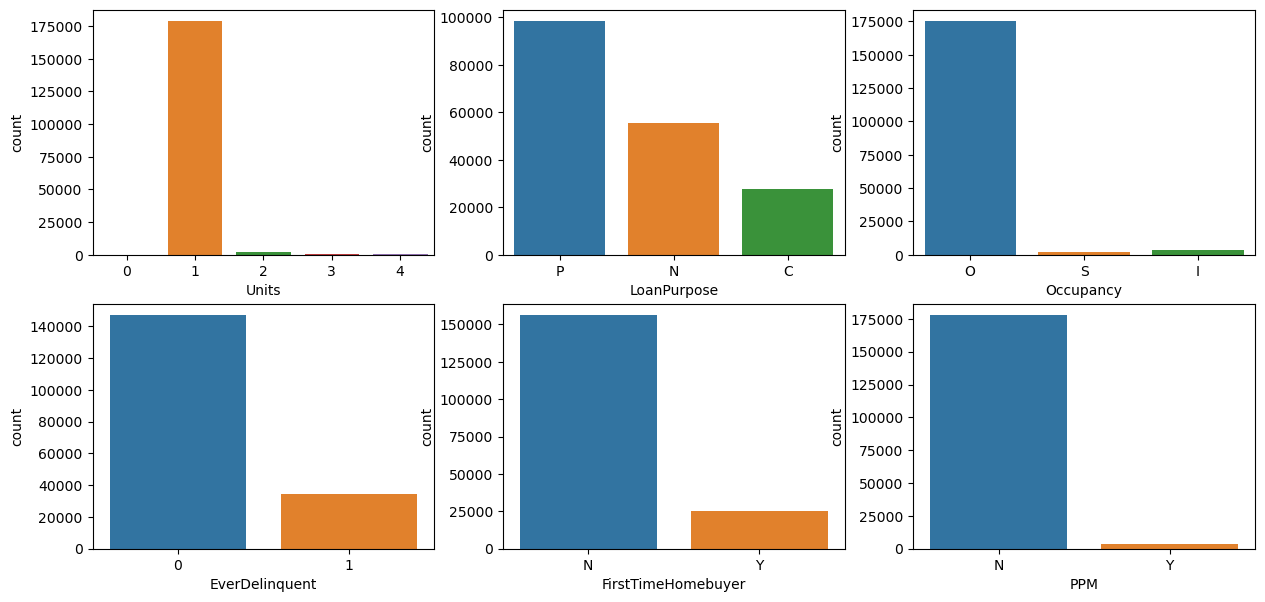

In [41]:
fig, ax =plt.subplots(2,3,figsize=(15,7))
sns.countplot(x=data['Units'], ax=ax[0,0],)
sns.countplot(x=data['LoanPurpose'], ax=ax[0,1])
sns.countplot(x=data['Occupancy'],ax=ax[0,2])
sns.countplot(x=data['EverDelinquent'],ax=ax[1,0])
sns.countplot(x=data['FirstTimeHomebuyer'],ax=ax[1,1])
sns.countplot(x=data['PPM'],ax=ax[1,2])

plt.show()



## We will plot the boxplot and histogram for all numerical variables.

In [42]:
df_num = data.select_dtypes(include = 'number')

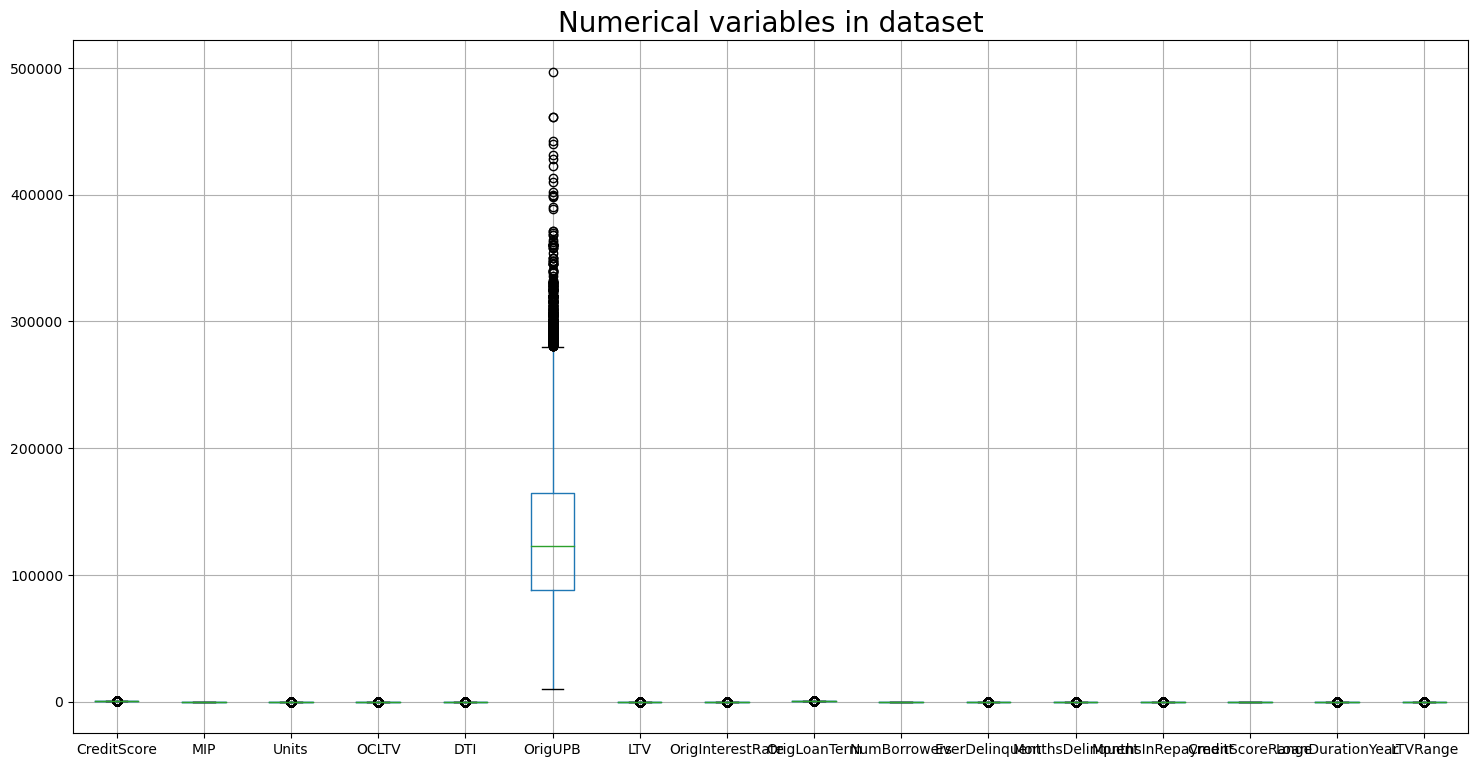

In [43]:
#Boxplot of numerical variables
plt.figure(figsize=(18,9))
df_num.boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

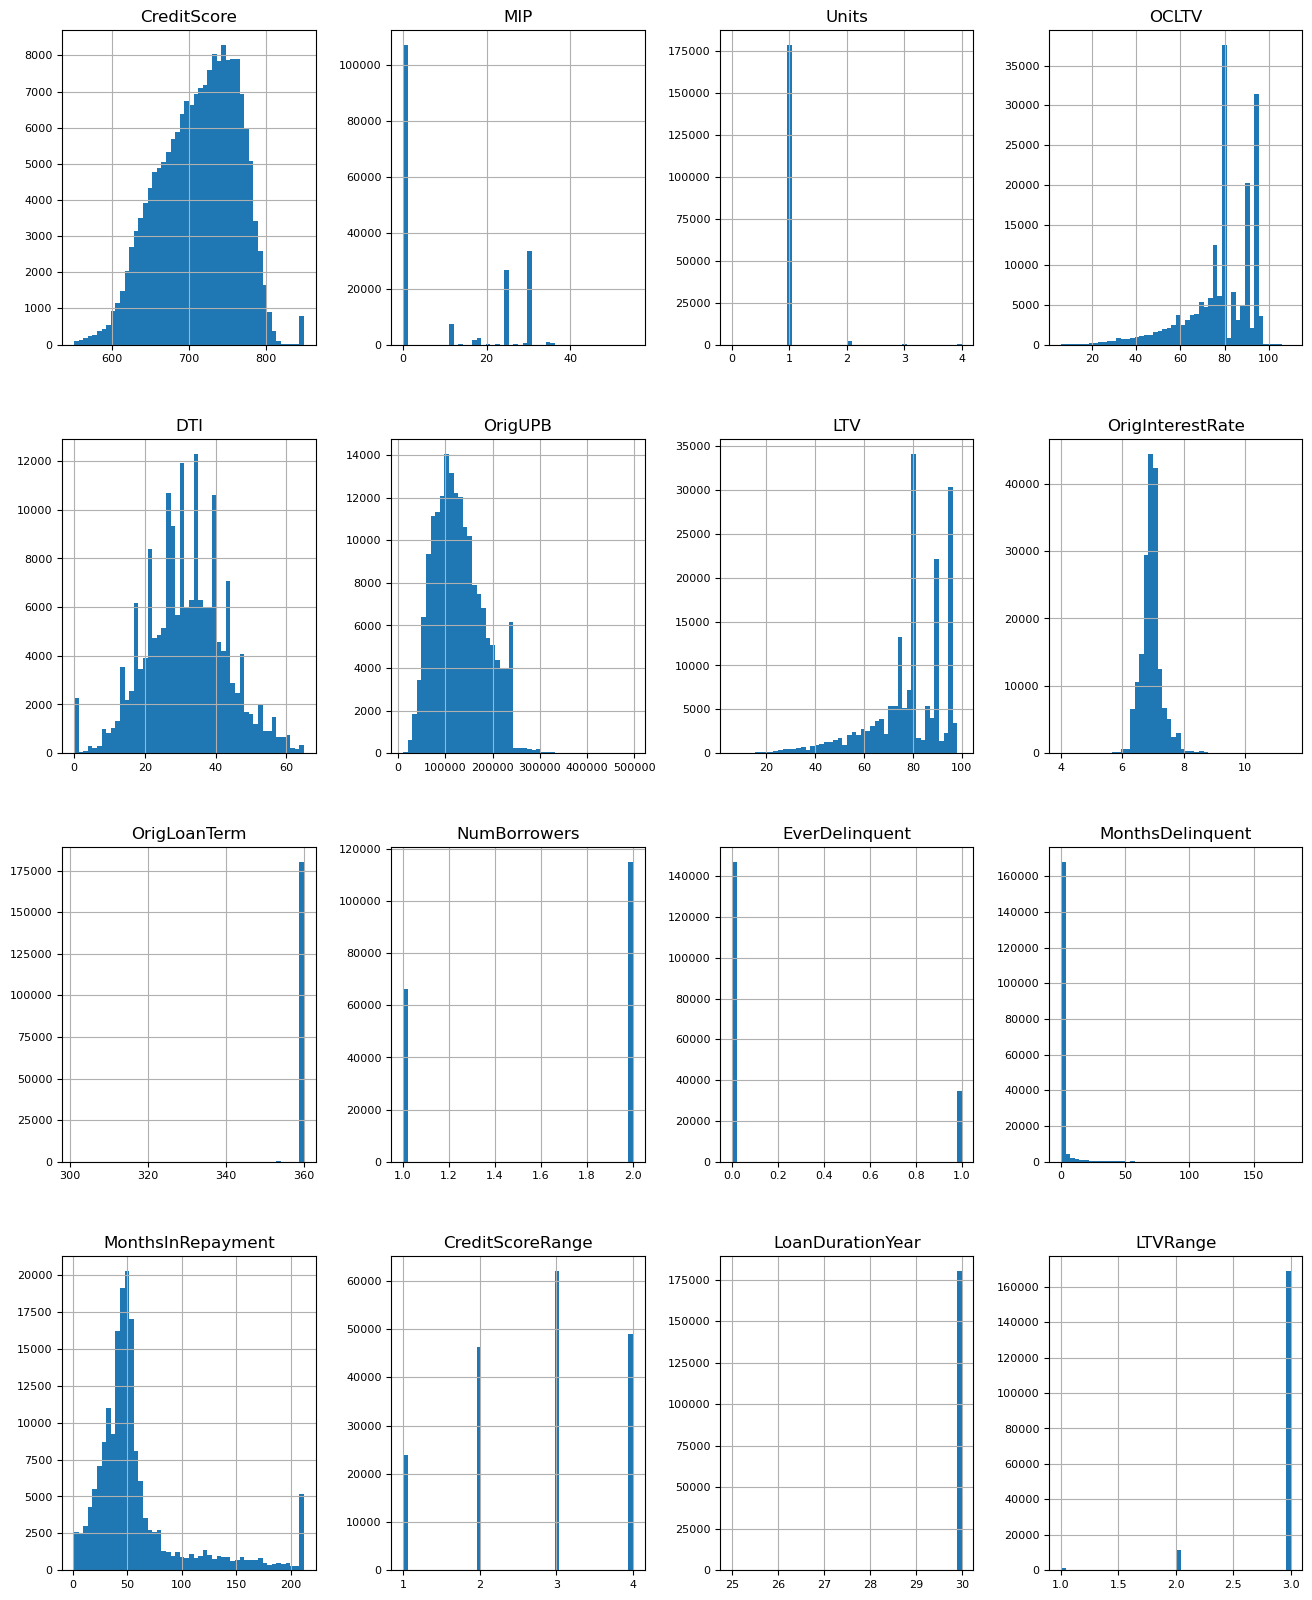

In [44]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## The mean of OrigInerestRate is maximum in the year 2000 followed by 2001 and lowest in 2004. There are a lot of outliers in the year 1999

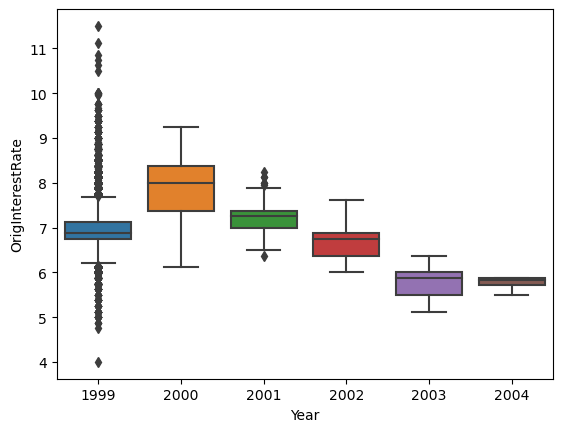

In [45]:
data['Year']= pd.to_datetime(data['FirstPaymentDate'], format='%m/%Y').dt.year # Convert to datetime format
sns.boxplot(x=data['Year'], y=data['OrigInterestRate'])
plt.show()


## We checked about the proprty type and its relation with originalInterestRate and Delinquency. There are a lot of outliers.

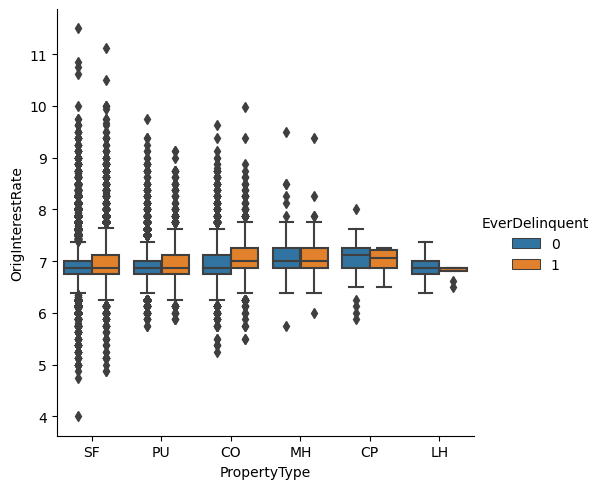

In [46]:
sns.catplot(x='PropertyType', y='OrigInterestRate', hue='EverDelinquent', data=data, kind='box')
plt.show()

## We will do some multivariate analysis to further understand the data.

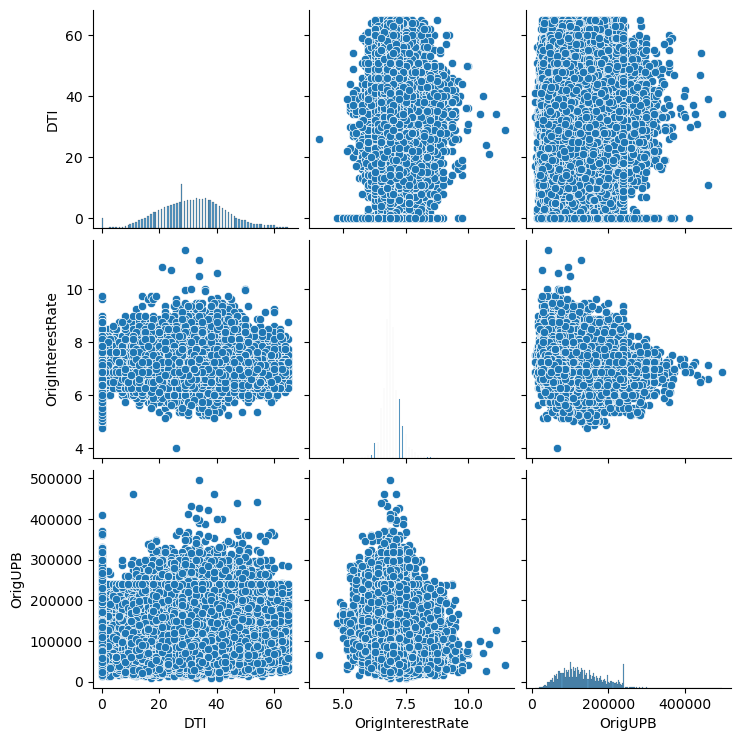

In [47]:
# Perform multivariate analysis
sns.pairplot(data[['DTI', 'OrigInterestRate',  'OrigUPB']])
plt.show()


### Lets check the dependency of the columns with everdelinquent column.

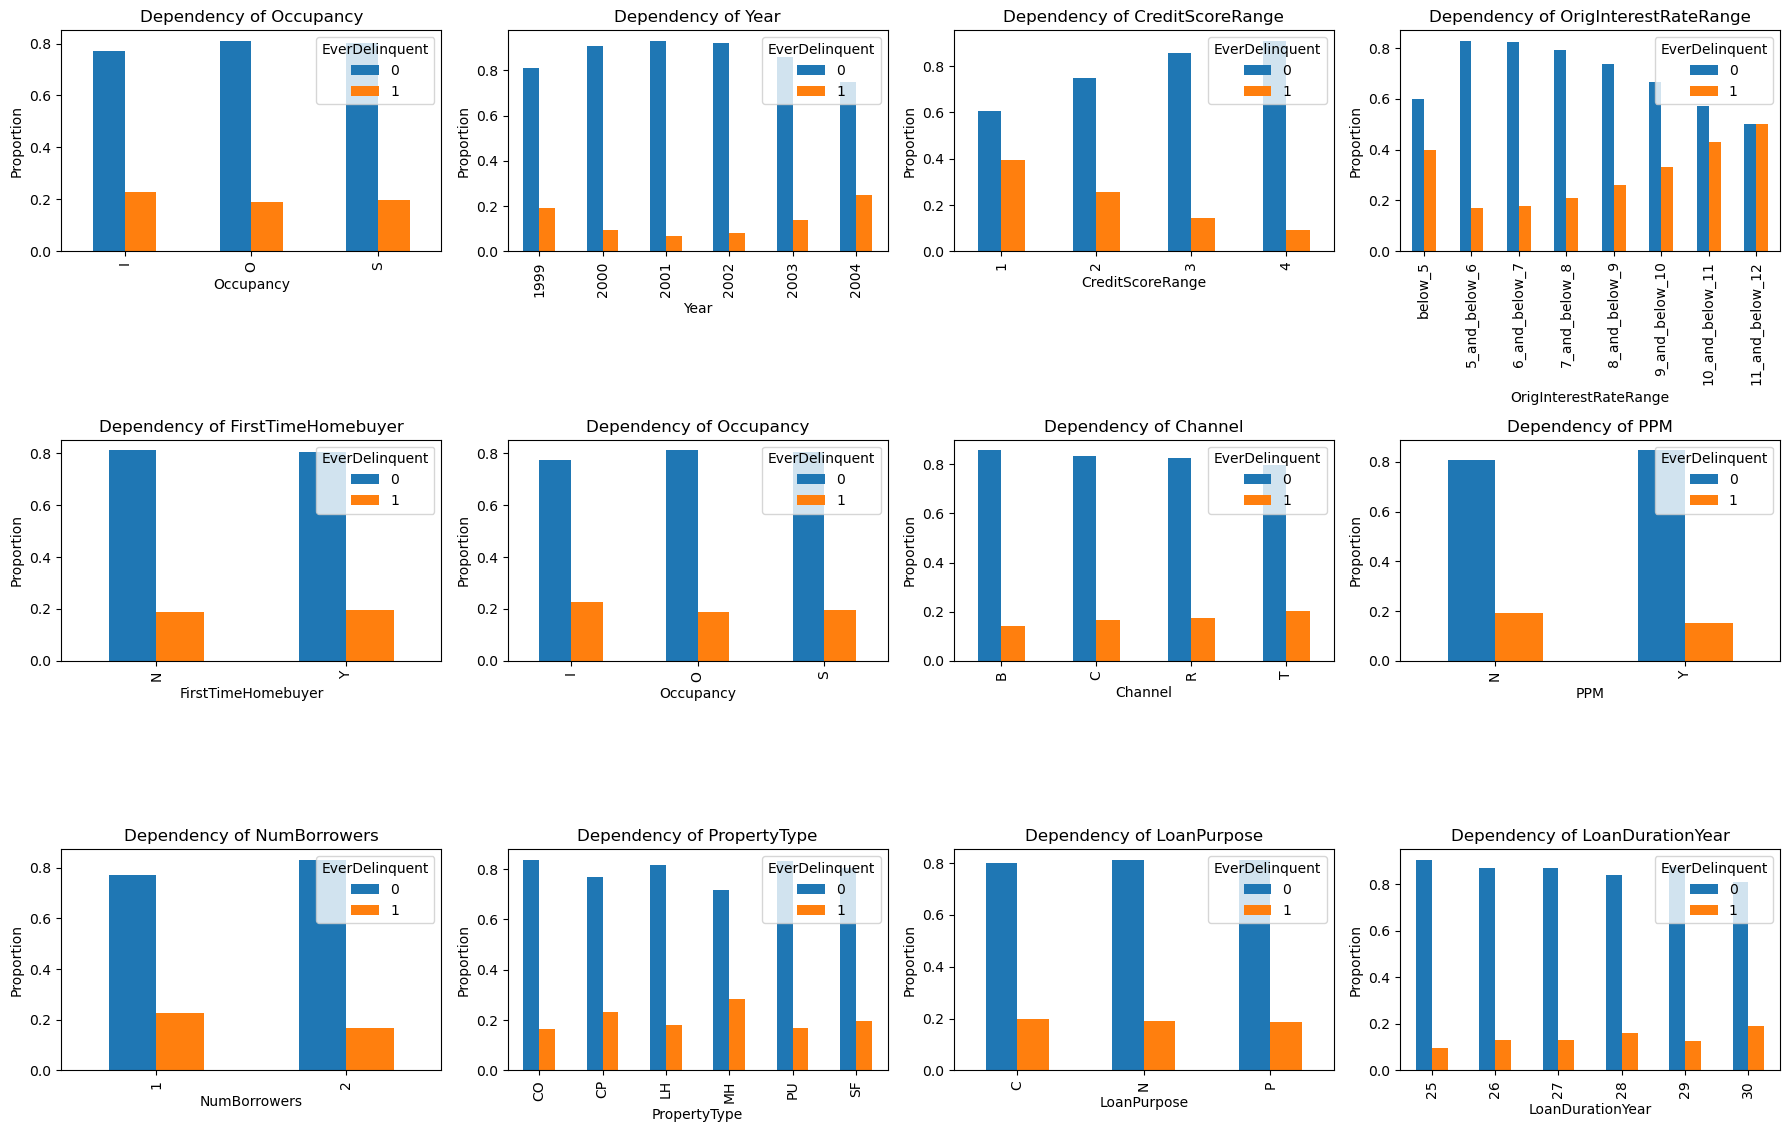

In [48]:
cols=['Occupancy','Year','CreditScoreRange',
    'OrigInterestRateRange',
     'FirstTimeHomebuyer',
    'Occupancy',
    'Channel',
    'PPM','NumBorrowers',
    'PropertyType',
    'LoanPurpose',
    'LoanDurationYear']
num_rows = 4  # Number of rows
num_cols = 4  # Number of columns

fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axs array to access subplots by index
axs = axs.flatten()

# Iterate over columns and create subplots
for i, x in enumerate(cols):
    df = pd.crosstab(data[x], data['EverDelinquent'])
    df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', ax=axs[i])
    axs[i].set_title('Dependency of ' + x , fontsize=12)
    axs[i].set_xlabel(x)
    axs[i].set_ylabel('Proportion')
    axs[i].legend(title='EverDelinquent')

# Hide any unused subplots
for j in range(len(cols), num_rows * num_cols):
    fig.delaxes(axs[j])

fig.tight_layout()
plt.show()

### We can see that from the plots that occupancy type do not have much impact on delinquency as it is distributed equally. Year has some impact here, in 2004 and 2009 there were more Delinquency. Credit score also have a notable impact here, when the credit score is lesser more delinquency has happened. The The interest  range till 12% shows steady increase in Delinquency  but after that there is no delinquency which is to be noted in particular. As OCLTV increases the delinquency increases and same thing can be seen with DT. MIP value shows a steady increase in delinquency as the value increases may be because of the insurance protection. First time home buyers, occupancy, and loan purpose show not much delinquency changes in its catagories. There is an influence of property type, loan duration year,PPM and number of borrowers in delinquency.

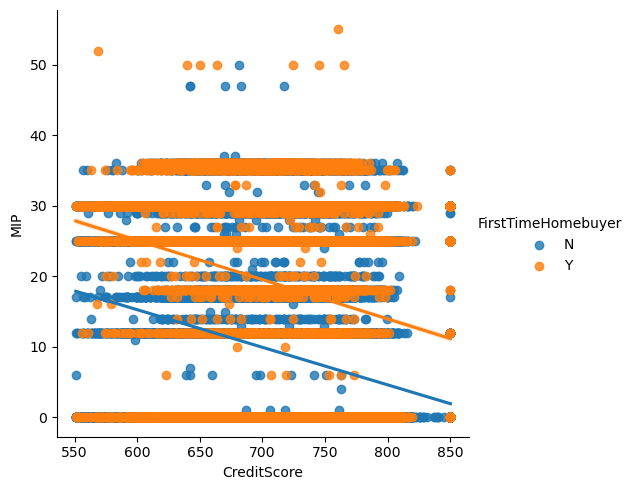

In [49]:

sns.lmplot(x='CreditScore', y='MIP', hue='FirstTimeHomebuyer', data=data)
plt.show()


<Axes: xlabel='LTVRange', ylabel='count'>

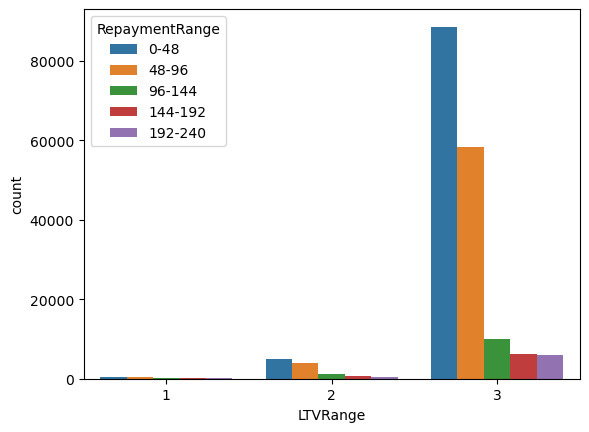

In [50]:
sns.countplot(data, x='LTVRange', hue='RepaymentRange')

## The figure shows the correlation matrix of the data.

In [51]:
cormat = data.corr()
round(cormat,2)
cormat.style.background_gradient(cmap='coolwarm') 


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,LoanDurationYear,LTVRange
CreditScore,1.000000,-0.218184,0.008352,-0.254317,-0.130434,-0.018204,-0.254741,-0.130369,-0.020528,-0.053382,-0.250769,-0.177140,0.013195,0.021976,0.948809,-0.018845,-0.157561
MIP,-0.218184,1.000000,-0.031880,0.719612,0.121157,0.008826,0.720995,0.128485,0.023476,-0.036769,0.067339,0.056271,-0.088086,-0.027514,-0.215227,0.020711,0.208003
Units,0.008352,-0.031880,1.000000,-0.031039,0.003720,0.036994,-0.030948,0.061934,0.001526,-0.016771,0.009171,0.000099,0.023599,-0.000946,0.009670,0.000849,-0.003434
OCLTV,-0.254317,0.719612,-0.031039,1.000000,0.143264,0.112211,0.999398,0.107749,0.029893,-0.028488,0.069835,0.062753,-0.096510,-0.034422,-0.247739,0.027766,0.686475
DTI,-0.130434,0.121157,0.003720,0.143264,1.000000,0.090014,0.143025,0.052111,0.033591,-0.091985,0.047292,0.033571,-0.051742,-0.020507,-0.128964,0.033650,0.083038
OrigUPB,-0.018204,0.008826,0.036994,0.112211,0.090014,1.000000,0.111439,-0.119874,-0.016088,0.232296,-0.063116,-0.061801,-0.209800,0.028339,-0.011371,-0.014450,0.147821
LTV,-0.254741,0.720995,-0.030948,0.999398,0.143025,0.111439,1.000000,0.108129,0.029817,-0.028745,0.070137,0.062938,-0.096870,-0.034665,-0.248159,0.027690,0.686652
OrigInterestRate,-0.130369,0.128485,0.061934,0.107749,0.052111,-0.119874,0.108129,1.000000,0.030966,-0.056059,0.061014,0.051990,-0.128637,-0.035953,-0.130691,0.025281,0.038466
OrigLoanTerm,-0.020528,0.023476,0.001526,0.029893,0.033591,-0.016088,0.029817,0.030966,1.000000,-0.014122,0.009774,0.005399,0.013366,-0.733557,-0.017837,0.978936,0.015388
NumBorrowers,-0.053382,-0.036769,-0.016771,-0.028488,-0.091985,0.232296,-0.028745,-0.056059,-0.014122,1.000000,-0.073583,-0.050739,-0.051910,0.013697,-0.044761,-0.013364,-0.000137


In [52]:
#Now we'll try to find which features are strongly correlated with CreditScore
cormat = cormat['CreditScore'][:-1]  # -1 because the latest row is SalePrice
golden_features_list = cormat[abs(cormat) > 0.05].sort_values(ascending=False)
print("There are {} strongly correlated values with CreditScore:\n{}".format(len(golden_features_list), golden_features_list))


There are 10 strongly correlated values with CreditScore:
CreditScore         1.000000
CreditScoreRange    0.948809
NumBorrowers       -0.053382
OrigInterestRate   -0.130369
DTI                -0.130434
MonthsDelinquent   -0.177140
MIP                -0.218184
EverDelinquent     -0.250769
OCLTV              -0.254317
LTV                -0.254741
Name: CreditScore, dtype: float64


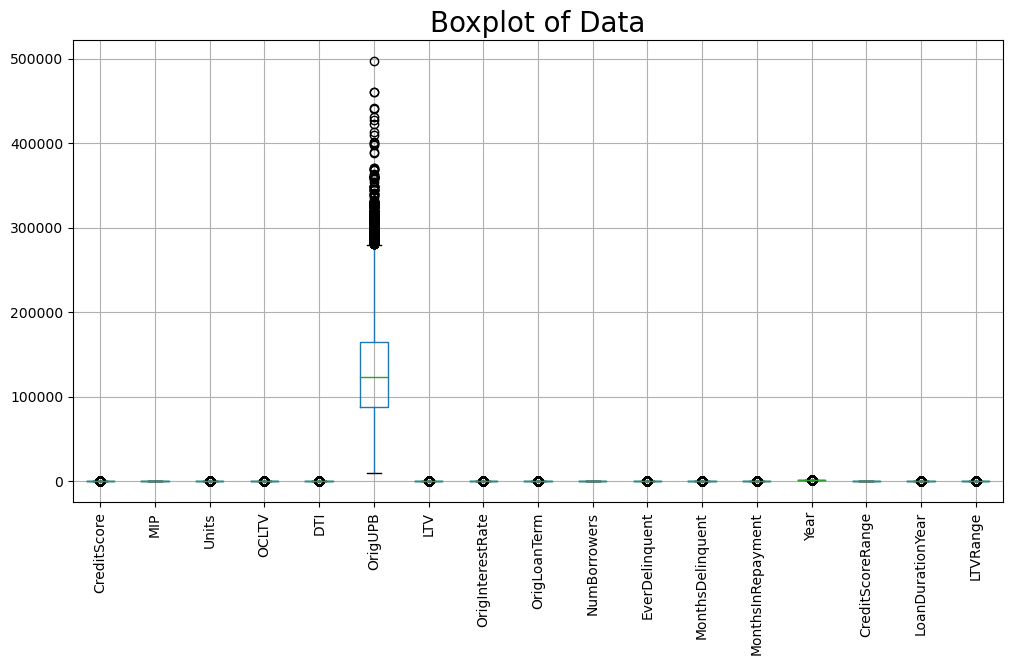

In [53]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.title("Boxplot of Data", fontsize=20)
plt.show()

## We will find the ratio of OrigUPB and MSA to form a new column called UPBtoMSA. The lesser the value of UPBtoMSA means more security amount is payed by the customer. We will create a band for this also.

In [54]:
data['UPBtoMSA']=(data['OrigUPB'] / data['MSA'].astype(int))
print('min',data['UPBtoMSA'].min())
print('max',data['UPBtoMSA'].max())
print('mean',data['UPBtoMSA'].mean())

min 0.20989001763076148
max 36.038394415357764
mean 4.9794517444842


# Feature engineering



In [55]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,FirstPaymentMonth,MaturityMonth,LoanDuration,LoanDurationYear,OrigInterestRateRange,LTVRange,RepaymentRange,UPBtoMSA
0,850,01/1999,N,01/2029,16974,25,1,O,89,27,117000,89,6.750,T,N,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,4,01,01,10958 days,30,6_and_below_7,3,48-96,6.892895
1,850,01/1999,N,01/2029,19740,0,1,O,73,17,109000,73,6.500,R,N,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,4,01,01,10958 days,30,6_and_below_7,3,96-144,5.521783
2,850,01/1999,N,01/2029,29940,0,1,O,75,16,88000,75,6.875,T,N,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,4,01,01,10958 days,30,6_and_below_7,3,48-96,2.939212
3,850,01/1999,N,01/2029,31084,0,1,O,76,14,160000,76,6.875,R,N,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,4,01,01,10958 days,30,6_and_below_7,3,0-48,5.147343
4,850,01/1999,N,01/2029,35644,0,1,O,78,18,109000,78,7.125,R,N,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,4,01,01,10958 days,30,7_and_below_8,3,48-96,3.058018


# Encoding the data

## we will do label encoding and ordinal encoding. Label encoding encodes the categorival columns as category approach. We have some columns with ordinal data , so we use ordinal encoding on them.

In [56]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode =[
    'FirstTimeHomebuyer',
    'PPM'
    ]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the specified columns
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])


In [57]:

from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

columns_to_encode = [
    'OrigInterestRateRange',
    'RepaymentRange'
    ]

category_order = [
   
    ['below_5', '5_and_below_6', '6_and_below_7', '7_and_below_8','8_and_below_9','9_and_below_10','10_and_below_11','11_and_below_12','above_12'],
    ['0-48', '48-96', '96-144','144-192','192-240']
]

# Initialize the OrdinalEncoder with specified category order
ordinal_encoder = OrdinalEncoder(categories=category_order)

# Encode the specified columns
data[columns_to_encode] = ordinal_encoder.fit_transform(data[columns_to_encode])

# Print the encoded dataset
data.head()


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,PropertyState,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,Year,CreditScoreRange,FirstPaymentMonth,MaturityMonth,LoanDuration,LoanDurationYear,OrigInterestRateRange,LTVRange,RepaymentRange,UPBtoMSA
0,850,01/1999,0,01/2029,16974,25,1,O,89,27,117000,89,6.750,T,0,IL,SF,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,1999,4,01,01,10958 days,30,2.0,3,1.0,6.892895
1,850,01/1999,0,01/2029,19740,0,1,O,73,17,109000,73,6.500,R,0,CO,SF,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,1999,4,01,01,10958 days,30,2.0,3,2.0,5.521783
2,850,01/1999,0,01/2029,29940,0,1,O,75,16,88000,75,6.875,T,0,KS,SF,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,1999,4,01,01,10958 days,30,2.0,3,1.0,2.939212
3,850,01/1999,0,01/2029,31084,0,1,O,76,14,160000,76,6.875,R,0,CA,SF,N,360,2,GM,GMACMTGECORP,0,0,35,1999,4,01,01,10958 days,30,2.0,3,0.0,5.147343
4,850,01/1999,0,01/2029,35644,0,1,O,78,18,109000,78,7.125,R,0,NJ,SF,N,360,2,GM,GMACMTGECORP,0,0,54,1999,4,01,01,10958 days,30,3.0,3,1.0,3.058018


## Droping unnecessary columns

In [58]:
data.drop(['FirstPaymentDate','MaturityDate','Units','Occupancy','Year','MSA','OrigUPB','Channel','PropertyState','PropertyType','LoanPurpose','SellerName','ServicerName','FirstPaymentMonth','MaturityMonth','LoanDuration','LoanDurationYear','OrigInterestRateRange','UPBtoMSA','MonthsDelinquent'],axis=1, inplace=True)
data.shape

(181248, 15)

## We have seen that there were many outliers in the data, we will remove them.

In [59]:
data.head()

,CreditScore,FirstTimeHomebuyer,MIP,OCLTV,DTI,LTV,OrigInterestRate,PPM,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsInRepayment,CreditScoreRange,LTVRange,RepaymentRange
0,850,0,25,89,27,89,6.750,0,360,2,0,52,4,3,1.0
1,850,0,0,73,17,73,6.500,0,360,1,0,144,4,3,2.0
2,850,0,0,75,16,75,6.875,0,360,2,0,67,4,3,1.0
3,850,0,0,76,14,76,6.875,0,360,2,0,35,4,3,0.0
4,850,0,0,78,18,78,7.125,0,360,2,0,54,4,3,1.0


In [60]:
'''
def remove_outliers(data, columns, threshold=1.5):
    df = data.copy()
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Example usage
outlier_columns = ['CreditScore', 'LTV']
data = remove_outliers(data, outlier_columns)

'''

"\ndef remove_outliers(data, columns, threshold=1.5):\n    df = data.copy()\n    for column in columns:\n        q1 = df[column].quantile(0.25)\n        q3 = df[column].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - threshold * iqr\n        upper_bound = q3 + threshold * iqr\n        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df\n# Example usage\noutlier_columns = ['CreditScore', 'LTV']\ndata = remove_outliers(data, outlier_columns)\n\n"

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181248 entries, 0 to 291450
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         181248 non-null  int64  
 1   FirstTimeHomebuyer  181248 non-null  int32  
 2   MIP                 181248 non-null  int64  
 3   OCLTV               181248 non-null  int64  
 4   DTI                 181248 non-null  int64  
 5   LTV                 181248 non-null  int64  
 6   OrigInterestRate    181248 non-null  float64
 7   PPM                 181248 non-null  int32  
 8   OrigLoanTerm        181248 non-null  int64  
 9   NumBorrowers        181248 non-null  int32  
 10  EverDelinquent      181248 non-null  int64  
 11  MonthsInRepayment   181248 non-null  int64  
 12  CreditScoreRange    181248 non-null  int32  
 13  LTVRange            181248 non-null  int32  
 14  RepaymentRange      181248 non-null  float64
dtypes: float64(2), int32(5), int64(8)


## There is a chance of overfitting of the data, so we smote function to balance the data

In [62]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data.drop("EverDelinquent", axis=1)
y = data["EverDelinquent"]

bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
featureScores.sort_values(by='Score', ascending=False)

,Specs,Score
10,MonthsInRepayment,312110.752101
0,CreditScore,41422.627934
2,MIP,13589.055889
13,RepaymentRange,11659.226762
11,CreditScoreRange,3966.108289
5,LTV,2695.271685
3,OCLTV,2674.773182
4,DTI,1653.321540
9,NumBorrowers,139.410894
7,PPM,31.128898


## We will use Smote to balance the data.

In [63]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(x_smote), columns=x.columns)
'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\npd.DataFrame(scaler.fit_transform(x_smote), columns=x.columns)\n'

In [64]:
y.value_counts()

0    146768
1     34480
Name: EverDelinquent, dtype: int64

In [65]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_smote, y_smote = smt.fit_resample(x, y)

In [66]:
y_smote.value_counts()

0    142023
1    142023
Name: EverDelinquent, dtype: int64

In [67]:
#Now Concat the x_smote and y_smote and make balance dataframe
df_smote_over = pd.concat([pd.DataFrame(x_smote,columns=['CreditScore','FirstTimeHomebuyer','MIP','OCLTV','DTI','LTV','OrigInterestRate','PPM','OrigLoanTerm','NumBorrowers','MonthsInRepayment','CreditScoreRange','LTVRange','RepaymentRange']), pd.DataFrame(y_smote, columns=['EverDelinquent'])], axis=1)

In [68]:
for x in df_smote_over.columns:
  if(x=="OrigInterestRate"):
    continue
  df_smote_over[x]=df_smote_over[x].astype(int)


In [69]:
df_numeric = df_smote_over.select_dtypes(include=[np.number])
print(np.mean(df_numeric))
print(np.std(df_numeric))


CreditScore           702.567559
FirstTimeHomebuyer      0.100128
MIP                    11.237895
OCLTV                  79.001313
DTI                    31.924671
LTV                    78.981151
OrigInterestRate        6.942382
PPM                     0.012766
OrigLoanTerm          359.887568
NumBorrowers            1.517694
MonthsInRepayment      67.186413
CreditScoreRange        2.543683
LTVRange                2.932486
RepaymentRange          0.890715
EverDelinquent          0.500000
dtype: float64
CreditScore           53.094492
FirstTimeHomebuyer     0.300171
MIP                   13.337838
OCLTV                 14.928741
DTI                   11.172129
LTV                   14.922246
OrigInterestRate       0.327103
PPM                    0.112261
OrigLoanTerm           1.861175
NumBorrowers           0.499687
MonthsInRepayment     50.443539
CreditScoreRange       1.027370
LTVRange               0.273365
RepaymentRange         1.118160
EverDelinquent         0.500000
dtype: flo

In [70]:
df=df_smote_over
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284046 entries, 0 to 284045
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         284046 non-null  int32  
 1   FirstTimeHomebuyer  284046 non-null  int32  
 2   MIP                 284046 non-null  int32  
 3   OCLTV               284046 non-null  int32  
 4   DTI                 284046 non-null  int32  
 5   LTV                 284046 non-null  int32  
 6   OrigInterestRate    284046 non-null  float64
 7   PPM                 284046 non-null  int32  
 8   OrigLoanTerm        284046 non-null  int32  
 9   NumBorrowers        284046 non-null  int32  
 10  MonthsInRepayment   284046 non-null  int32  
 11  CreditScoreRange    284046 non-null  int32  
 12  LTVRange            284046 non-null  int32  
 13  RepaymentRange      284046 non-null  int32  
 14  EverDelinquent      284046 non-null  int32  
dtypes: float64(1), int32(14)
memory us

## We will be splitting the data in to test and train datas. We will find accuracy of components 

In [71]:
x = df.drop("EverDelinquent", axis=1)
y = df["EverDelinquent"]

In [72]:
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=14, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head()
'''

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=14, svd_solver="full")\nx = pd.DataFrame(pca.fit_transform(x), columns=x.columns)\nx.head()\n'

## Regression analysis and cross validation

## Logistic Regression model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)
lr_accuracy=accuracy_score(y_test, y_pred)

# Perform cross-validation
lr_cross_val_scores = cross_val_score(model, x, y, cv=5,scoring='roc_auc')  # cv=5 for 5-fold cross-validation

print("Cross-validation scores:", lr_cross_val_scores)
print("Average cross-validation score:", lr_cross_val_scores.mean())
print("Logistic regression Accuracy score:", accuracy_score(y_test, y_pred))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("R-squared score:", r2_score(y_test, y_pred))

print('Classification Report:\n',classification_report(y_test,y_pred))
    
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.47689155 0.66607291 0.85275426 0.89061701 0.86620507]
Average cross-validation score: 0.7505081584552278
Logistic regression Accuracy score: 0.7200668896321071
ROC AUC score: 0.7200725285044332
R-squared score: -0.11973264131379113
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     28393
           1       0.73      0.71      0.72     28417

    accuracy                           0.72     56810
   macro avg       0.72      0.72      0.72     56810
weighted avg       0.72      0.72      0.72     56810

Confusion Matrix:
 [[20824  7569]
 [ 8334 20083]]


##  Hyperparametric tuning on Logistic Regression model

In [74]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'penalty' : ['l1','l2'], # Also known as regularization. It specifies the norm of the penalty. 
                'C'       : [10.0, 25.0, 50.0], # it shows the Inverse of regularization strength. 
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear']        # Whether to calculate the intercept for this model
}

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='recall')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
hlr_accuracy = accuracy_score(y_test, y_pred)
hlr=grid_search.best_score_

# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hlr_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Best hyperparameters: {'C': 50.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best model: LogisticRegression(C=50.0, solver='liblinear')
Grid search best score: 0.7073217726620846
Accuracy score: 0.7210526315789474
Roc_auc: 0.7210579434263567
R-squared score: -0.11578967282271568
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.72     28393
           1       0.73      0.71      0.72     28417

    accuracy                           0.72     56810
   macro avg       0.72      0.72      0.72     56810
weighted avg       0.72      0.72      0.72     56810

Confusion Matrix:
 [[20830  7563]
 [ 8284 20133]]


## Random Forest Classifier model

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# predict
y_pred = rfc.predict(x_test)# check performance
rfc_cross_val_scores = cross_val_score(rfc, x, y, cv=5,scoring='recall')
rfc_accuracy= accuracy_score(y_test, y_pred)

print("Cross-validation scores:", rfc_cross_val_scores)
print("Average cross-validation score:", rfc_cross_val_scores.mean())
print('Random Forest Accuracy score:',accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.71779616 0.83185467 0.96623715 0.96708326 0.96571026]
Average cross-validation score: 0.8897363005936846
Random Forest Accuracy score: 0.8730153142052456
Roc_auc: 0.8730172844924878
R-squared score: 0.49206116616753515
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     28393
           1       0.88      0.87      0.87     28417

    accuracy                           0.87     56810
   macro avg       0.87      0.87      0.87     56810
weighted avg       0.87      0.87      0.87     56810

Confusion Matrix:
 [[24920  3473]
 [ 3741 24676]]


##  Hyperparametric tuning on Random Forest Classifier model

In [76]:

# Define the hyperparameters grid
param_grid = {
               'max_depth': [9, 53, 101], # this is the longest path between the root node and the leaf node. It is possible to limit the depth of every tree in the random forest is goint to grow
                'max_features': [1, 3], # It shows the number of features to consider when the model is looking for the best split.
                'n_estimators': [100, 300], # it defines the number of trees in the forest.
               'criterion' :['gini', 'entropy'] # Checks the quality of the split.
}

# Initialize the Random Forest classifier
rfc = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
hrf_accuracy = accuracy_score(y_test, y_pred)
hrf=grid_search.best_score_ 
# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hrf_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))



Best hyperparameters: {'criterion': 'entropy', 'max_depth': 101, 'max_features': 3, 'n_estimators': 300}
Best model: RandomForestClassifier(criterion='entropy', max_depth=101, max_features=3,
                       n_estimators=300)
Grid search best score: 0.8652326186956752
Accuracy score: 0.8753564513289914
Roc_auc: 0.8753587120529951
R-squared score: 0.5014257163338393
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     28393
           1       0.88      0.87      0.87     28417

    accuracy                           0.88     56810
   macro avg       0.88      0.88      0.88     56810
weighted avg       0.88      0.88      0.88     56810

Confusion Matrix:
 [[25006  3387]
 [ 3694 24723]]


## Important features of the dataset.

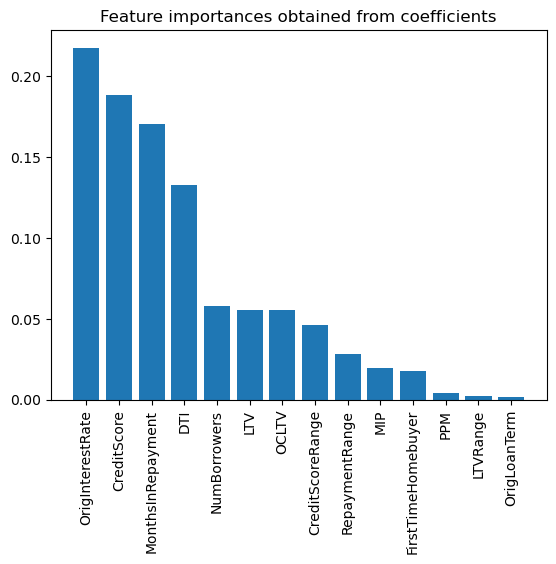

In [77]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# predict
y_pred = rfc.predict(x_test)
importances = pd.DataFrame(data={
    'Name': x_train.columns,
    'Importance': rfc.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Name'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()


## XGBoost regression model

In [78]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(x_train, y_train)

# Predict on the testing data
y_pred = xgb_model.predict(x_test)

xgb_cross_val_scores = cross_val_score(xgb_model, x, y, cv=5,scoring='recall')
xgb_accuracy=accuracy_score(y_test, y_pred)

print("Cross-validation scores:", xgb_cross_val_scores)
print("Average cross-validation score:", xgb_cross_val_scores.mean())
print('XG Boost Accuracy score:',accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:',r2_score(y_test, y_pred))


print('Classification Report:\n',classification_report(y_test,y_pred))
    
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.55571202 0.78027743 0.93430503 0.9291322  0.92923781]
Average cross-validation score: 0.8257328961975228
XG Boost Accuracy score: 0.85710262277768
Roc_auc: 0.857135183503982
R-squared score: 0.42841038909731777
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87     28393
           1       0.92      0.78      0.85     28417

    accuracy                           0.86     56810
   macro avg       0.87      0.86      0.86     56810
weighted avg       0.87      0.86      0.86     56810

Confusion Matrix:
 [[26525  1868]
 [ 6250 22167]]


##  Hyperparametric tuning on XGBoost model

In [79]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters grid
param_grid = [{'max_depth': [3, 6, 9],
               'learning_rate': [0.1, 0.01, 0.001],
               'n_estimators': [50, 150],
               'reg_alpha': [0, 0.1, 0.5]
              }]

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate evaluation metrics
hxgb_accuracy = accuracy_score(y_test, y_pred)
hxgb=grid_search.best_score_

# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hxgb_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 150, 'reg_alpha': 0}
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Grid search best score: 0.858411513306456
Accuracy score: 0.8593557472276008
Roc_auc: 0.8593880406462424
R-squared score: 0.43742288850549016


## KNN Classifier model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"K={k}, Accuracy: {accuracy}")

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K value: {best_k}")

K=1, Accuracy: 0.8565393416651997
K=2, Accuracy: 0.8431614152437951
K=3, Accuracy: 0.8218095405738426
K=4, Accuracy: 0.8190987502200316
K=5, Accuracy: 0.8007921140644253
K=6, Accuracy: 0.8004928709734201
K=7, Accuracy: 0.7870621369477204
K=8, Accuracy: 0.7883119169160359
K=9, Accuracy: 0.7778032036613273
Best K value: 1


In [81]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model on the training data
knn.fit(x_train, y_train)

# Predict on the testing data
y_pred = knn.predict(x_test)


knn_cross_val_scores = cross_val_score(knn, x, y, cv=5,scoring= 'recall')
knn_accuracy=accuracy_score(y_test, y_pred)

print("Cross-validation scores:", knn_cross_val_scores)
print("Average cross-validation score:", knn_cross_val_scores.mean())
print('KNN Accuracy score:',accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))


print('Classification Report:\n',classification_report(y_test,y_pred))
   
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.96585108 0.93490353 0.96211801 0.96194332 0.95993663]
Average cross-validation score: 0.956950515905976
KNN Accuracy score: 0.8565393416651997
Roc_auc: 0.8565005427611342
R-squared score: 0.42615726424527467
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     28393
           1       0.80      0.95      0.87     28417

    accuracy                           0.86     56810
   macro avg       0.87      0.86      0.86     56810
weighted avg       0.87      0.86      0.86     56810

Confusion Matrix:
 [[21711  6682]
 [ 1468 26949]]


## Hyperparametric tuning on KNN model

In [82]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Create a hyperparameter grid
param_grid = {"n_neighbors": list(range(1, 10))}

# Perform hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, scoring="accuracy", cv=5)
grid_search.fit(x_train, y_train)

# Predict on the testing data
y_pred = grid_search.predict(x_test)

# Calculate the accuracy score
hknn_accuracy = accuracy_score(y_test, y_pred)
hknn=grid_search.best_score_

print('Grid search best parameters:',grid_search.best_params_)
print('Grid search best score:',grid_search.best_score_)
print("Accuracy score:", hknn_accuracy)
print("ROC AUC score:",roc_auc_score(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

# Print the classification report
print('Classification Report:\n',classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))


Grid search best parameters: {'n_neighbors': 1}
Grid search best score: 0.8386391220946198
Accuracy score: 0.8565393416651997
ROC AUC score: 0.8565005427611342
R2 score: 0.42615726424527467
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84     28393
           1       0.80      0.95      0.87     28417

    accuracy                           0.86     56810
   macro avg       0.87      0.86      0.86     56810
weighted avg       0.87      0.86      0.86     56810

Confusion Matrix:
 [[21711  6682]
 [ 1468 26949]]


## Decision Tree Model

In [83]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(x_train, y_train)

# Predict on the testing data
y_pred = dt.predict(x_test)

dt_cross_val_scores = cross_val_score(dt, x, y, cv=5,scoring= 'recall')
dt_accuracy=accuracy_score(y_test, y_pred)

print("Cross-validation scores:", dt_cross_val_scores)
print("Average cross-validation score:", dt_cross_val_scores.mean())
print('Decision tree Accuracy score:',accuracy_score(y_test, y_pred))
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))


print('Classification Report:\n',classification_report(y_test,y_pred))
   
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Cross-validation scores: [0.65192748 0.8309041  0.96472328 0.96046471 0.96370357]
Average cross-validation score: 0.8743446268429954
Decision tree Accuracy score: 0.8222496039429678
Roc_auc: 0.8222432066755675
R-squared score: 0.2889982888771514
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82     28393
           1       0.81      0.84      0.82     28417

    accuracy                           0.82     56810
   macro avg       0.82      0.82      0.82     56810
weighted avg       0.82      0.82      0.82     56810

Confusion Matrix:
 [[22916  5477]
 [ 4621 23796]]


## Hyperparametric tuning on Decision Tree Model

In [84]:
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


# Calculate evaluation metrics
hdt_accuracy = accuracy_score(y_test, y_pred)
hdt=grid_search.best_score_
# Print the results
print("Best hyperparameters:", grid_search.best_params_)
print('Best model:', best_model)
print('Grid search best score:',grid_search.best_score_)
print('Accuracy score:', hdt_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best model: DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)
Grid search best score: 0.8260838940788551
Accuracy score: 0.8283048759021299
Roc_auc: 0.8283130847713525
R-squared score: 0.3132193810366146
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83     28393
           1       0.84      0.81      0.82     28417

    accuracy                           0.83     56810
   macro avg       0.83      0.83      0.83     56810
weighted avg       0.83      0.83      0.83     56810

Confusion Matrix:
 [[24070  4323]
 [ 5431 22986]]


## Summary statistics

In [86]:
model_names = ['Logistic regression', 'Random Forest', 'XG Boost', 'KNN', 'Decision tree']
cross_val_scores = [lr_cross_val_scores.mean(), rfc_cross_val_scores.mean(), xgb_cross_val_scores.mean(),
                    knn_cross_val_scores.mean(), dt_cross_val_scores.mean()]
grid_cv_scores = [hlr, hrf, hxgb, hknn, hdt]
accuracy_scores = [lr_accuracy, rfc_accuracy, xgb_accuracy, knn_accuracy, dt_accuracy]
grid_cv_accuracy_scores = [hlr_accuracy, hrf_accuracy, hxgb_accuracy, hknn_accuracy, hdt_accuracy]

# Create a dictionary with the data
data = {
    'Model': model_names,
    'Average cross-validation score': cross_val_scores,
    'Grid CV cross-validation score': grid_cv_scores,
    'Accuracy score': accuracy_scores,
    'Grid CV Accuracy score': grid_cv_accuracy_scores
}

# Create a DataFrame from the dictionary
score_table = pd.DataFrame(data)

# Print the table
score_table.head()

,Model,Average cross-validation score,Grid CV cross-validation score,Accuracy score,Grid CV Accuracy score
0,Logistic regression,0.750508,0.707322,0.720067,0.721053
1,Random Forest,0.889736,0.865233,0.873015,0.875356
2,XG Boost,0.825733,0.858412,0.857103,0.859356
3,KNN,0.956951,0.838639,0.856539,0.856539
4,Decision tree,0.874345,0.826084,0.822250,0.828305


## The best accuracy we got is from Random forest model with accuracy of 87 %.  The hyperparametric tuning has not done mucgh of  a boost to the models.

## Support Vector Machine (SVM) model

In [87]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
svm_cross_val_scores = cross_val_score(dt, x, y, cv=5,scoring= 'recall')
# Print the accuracy

print("Cross-validation scores:", svm_cross_val_scores)
print("Average cross-validation score:", svm_cross_val_scores.mean())
print("SVM Accuracy:", svm_accuracy)
print('Roc_auc:', roc_auc_score(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))


print('Classification Report:\n',classification_report(y_test,y_pred))
   
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Cross-validation scores: [0.65242035 0.83079848 0.96468807 0.96085196 0.96373878]
Average cross-validation score: 0.8744995281573751
SVM Accuracy: 0.6858827671184651
Roc_auc: 0.685885202245216
R-squared score: -0.25646915577215634
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69     28393
           1       0.69      0.68      0.68     28417

    accuracy                           0.69     56810
   macro avg       0.69      0.69      0.69     56810
weighted avg       0.69      0.69      0.69     56810

Confusion Matrix:
 [[19638  8755]
 [ 9090 19327]]
